In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Tue, 07 Jul 2020 19:09


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,434,826","475,274,455","6,839,629",1.46%
HOV,"1,194,523","1,198,307","3,784",0.32%
Principal Arterial,"11,044,380","12,750,120","1,705,740",15.44%
Ramp,"352,596","296,676","-55,920",-15.86%
Total,"481,026,325","489,519,558","8,493,233",1.77%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","340,393,998","2,248,117",0.66%
Pierce,"76,929,900","80,773,440","3,843,540",5.00%
Snohomish,"65,950,544","68,352,120","2,401,576",3.64%
Total,"481,026,325","489,519,558","8,493,233",1.77%


----
### Scatterplots 

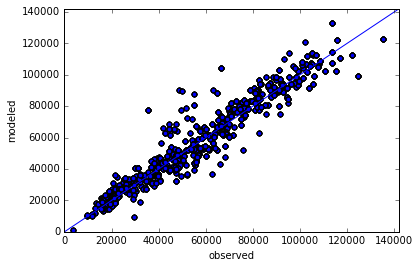

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.952303343458


---
By County

King r^2: 0.962070982363


Pierce r^2: 0.826041774584
Snohomish r^2: 0.966360994008


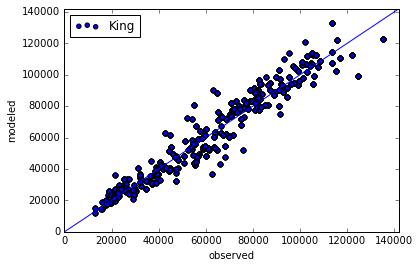

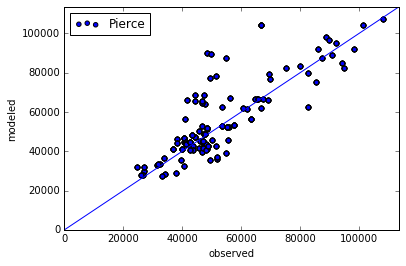

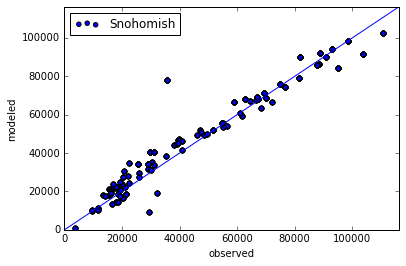

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.941203940342
r^2 Principal Arterial: 0.896982382176


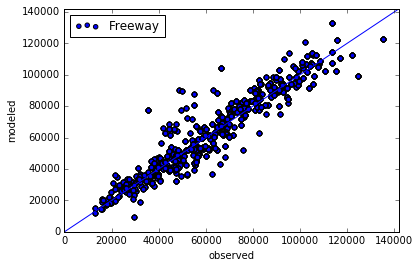

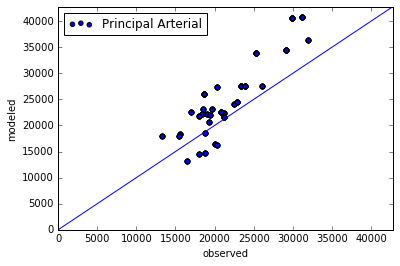

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","558,594","-9,823",-1.73%
1,KENT,"550,322","525,849","-24,473",-4.45%
2,SEATTLE - SOUTH OF CBD,"526,500","521,391","-5,109",-0.97%
3,SHIP CANAL,"519,802","560,601","40,799",7.85%
4,KIRKLAND-REDMOND,"414,120","406,041","-8,079",-1.95%
5,MILL CREEK,"400,848","404,030","3,182",0.79%
6,SOUTH BELLEVUE,"399,500","366,218","-33,282",-8.33%
7,SEATTLE - NORTH,"372,000","382,287","10,287",2.77%
8,TACOMA - EAST OF CBD,"312,164","338,351","26,187",8.39%
9,PARKLAND,"304,322","286,752","-17,570",-5.77%


r^2 : 0.993668619476


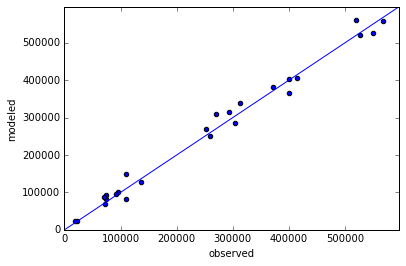

In [12]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","400,594","7,900",2.01%
5,Sound Transit,"145,426","150,823","5,397",3.71%
0,Community Transit,"30,918","33,588","2,670",8.63%
4,Pierce Transit,"27,233","34,756","7,523",27.63%
6,Washington Ferries,"16,912","12,267","-4,645",-27.46%
3,Kitsap Transit,"8,669","14,873","6,203",71.56%
1,Everett Transit,"3,290","1,797","-1,493",-45.38%


----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')

df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356",999,-357,-26.30%
1,POF Vashon Island -,670,729,59,8.81%
2,WSF Kingston - Edmon,"1,732",681,"-1,051",-60.66%
3,WSF Bainbridge Islan,"8,857","8,226",-631,-7.12%
4,WSF Bremerton - Seat,"4,484","1,412","-3,072",-68.51%
5,WSF Fauntleroy - Sou,365,27,-338,-92.62%
6,WSF Vashon Island -,946,"1,337",391,41.34%
7,WSF Southworth - Vas,239,315,77,32.18%
8,WSF Point Defiance -,289,268,-21,-7.21%


r^2 : 0.932291087812


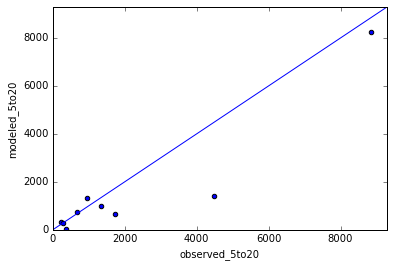

In [15]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","66,889","-2,494",-3.59%
1,Sounder South,"15,356","14,719",-637,-4.15%
2,Sounder North,"1,667","1,931",264,15.83%


r^2 : 0.999985181704


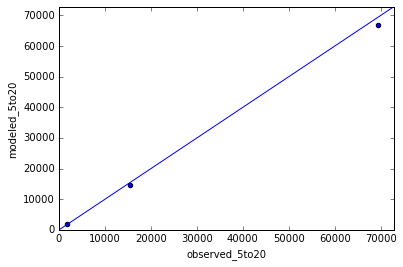

In [17]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,593",-743,-4.84%
4,C Line RapidRide,"11,368","12,835","1,467",12.90%
1,KC Metro 40,"11,405","12,438","1,033",9.06%
10,Sound Transit 550,"9,168","11,243","2,076",22.64%
0,KC Metro 7,"10,150","10,367",217,2.14%
5,D Line RapidRide,"13,078","9,442","-3,636",-27.80%
2,A Line RapidRide,"8,522","7,752",-770,-9.03%
7,F Line RapidRide,"5,267","7,246","1,979",37.57%
3,B Line RapidRide,"5,914","6,084",170,2.87%
8,SLU Streetcar,"1,703","1,398",-306,-17.95%


r^2 : 0.914489646686


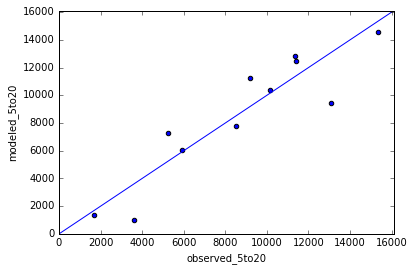

In [19]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.879676336859
r^2 Everett Transit: -0.364671048722
r^2 King County Metro: 0.931503834062


r^2 Kitsap Transit: 0.820411359858
r^2 Pierce Transit: 0.868423636161
r^2 Sound Transit: 0.996989028351


r^2 Washington Ferries: 0.932380482024


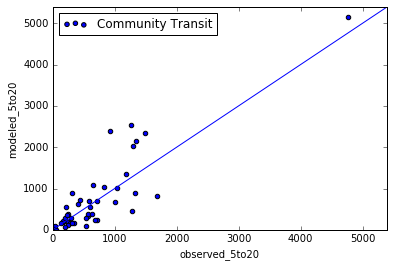

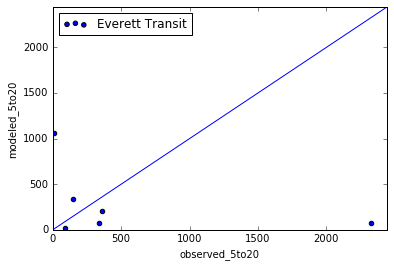

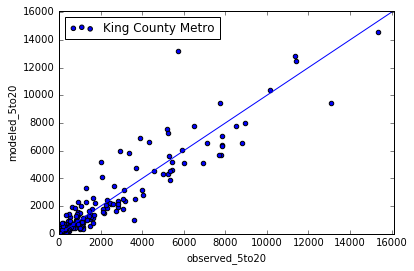

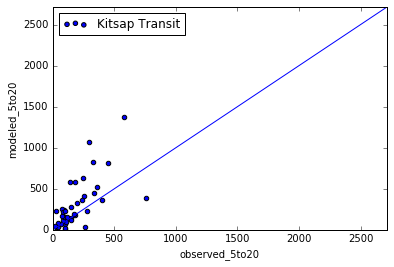

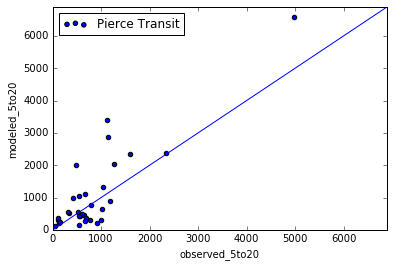

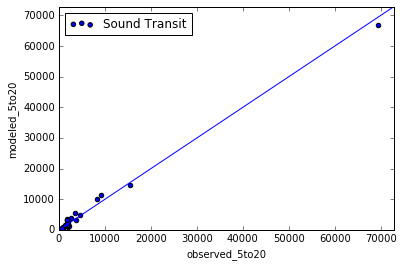

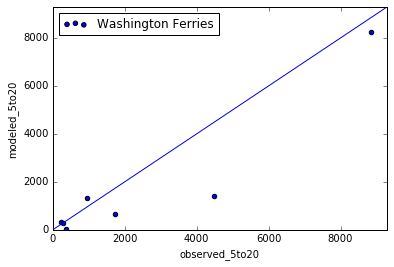

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","8,619",-796,-8.46%
Westlake,"10,904","6,983","-3,920",-35.95%
University St,"5,257","5,317",60,1.14%
Pioneer Square,"3,865","5,465","1,600",41.39%
Int'l District,"5,647","3,285","-2,362",-41.83%
Capitol Hill,"7,016","6,959",-57,-0.81%
Stadium,"1,912",867,"-1,046",-54.68%
SODO,"2,108","3,860","1,753",83.16%
Beacon Hill,"2,587","2,148",-439,-16.98%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","8,619",-796,-8.46%
Capitol Hill,"7,016","6,959",-57,-0.81%
Westlake/University St,"16,161","12,300","-3,860",-23.89%
Pioneer Square/Int'l District,"9,512","8,750",-762,-8.02%
Stadium/SODO,"4,020","4,727",707,17.58%
Beacon Hill/Mount Baker,"4,809","4,604",-205,-4.26%
Columbia City,"2,376","2,673",297,12.50%
Othello/Rainier Beach,"4,412","5,485","1,073",24.32%
Tukwila Int'l Blvd,"2,779","3,258",479,17.25%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.40,-99.00,99.40,-100.40%
Westlake,0.38,0.36,0.01,3.37%
University St,0.51,0.20,0.31,154.99%
Pioneer Square,0.51,0.16,0.35,219.16%
Int'l District,0.72,0.45,0.27,60.55%
Capitol Hill,0.05,-99.00,99.05,-100.05%
Stadium,0.27,0.12,0.16,130.69%
SODO,0.39,0.31,0.08,25.09%
Beacon Hill,0.32,0.35,-0.03,-9.75%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","133,553","3,553",2.73%
I-5 to Mount Vernon,3744,"67,000","60,181","-6,819",-10.18%
I-90 @ Snoqualmie Pass,3739,"33,000","30,631","-2,369",-7.18%
SR-532 to Camano Island,3746,"23,000","20,907","-2,093",-9.10%
SR-507 to Yelm,3734,"23,000","20,748","-2,252",-9.79%
SR-3 to Belfair,3749,"18,000","17,225",-775,-4.31%
Hood Canal Bridge,3748,"18,000","17,170",-830,-4.61%
SR-530 N/O Stanwood,3745,"9,100","8,693",-407,-4.47%
Mukilteo-Clinton Ferry,3747,"6,300","6,332",32,0.51%


# Corridor Speed

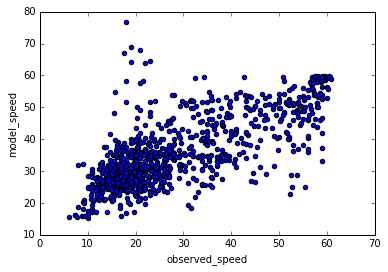

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [26]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,44,58
16,Everett to Seattle - SB,25,28
25,Tacoma to Seattle - NB,26,26
34,Seattle to Tacoma - SB,42,59
43,Bellevue to Lynnwood - NB,48,56
52,Lynnwood to Bellevue - SB,24,24
61,Tukwila to Bellevue - NB,27,19
70,Bellevue to Tukwila - SB,27,44
79,Auburn to Renton - NB,28,24
88,Renton to Auburn - SB,50,55


### PM Peak, Primary Corridors

In [27]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,27,24
11,Everett to Seattle - SB,40,28
20,Tacoma to Seattle - NB,41,42
29,Seattle to Tacoma - SB,30,27
38,Bellevue to Lynnwood - NB,28,24
47,Lynnwood to Bellevue - SB,43,41
56,Tukwila to Bellevue - NB,28,32
65,Bellevue to Tukwila - SB,27,20
74,Auburn to Renton - NB,49,44
83,Renton to Auburn - SB,31,32
